### Importation of Packages

In [ ]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

### Data Importation

In [ ]:
# Loading dataset
energy_df = pd.read_csv('Building Energy Efficiency.csv')

### Data Cleaning & Validation

In [ ]:
energy_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
energy_df.shape

(768, 10)

In [ ]:
energy_df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.763885,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105490,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.820000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
energy_df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [ ]:
energy_df.duplicated().sum()

0

 There are no missing values and outliers in the data set

In [ ]:
energy_df.value_counts()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  Orientation  Glazing Area  Glazing Area Distribution  Heating Load  Cooling Load
0.62                  808.5         367.5      220.50     3.5             2            0.00          0                          8.60          12.07           1
                                                                                       0.10          1                          12.96         14.34           1
0.79                  637.0         343.0      147.00     7.0             5            0.25          4                          40.12         37.26           1
                                                                                                     5                          38.65         43.73           1
                                                                                       0.40          1                          41.67         46.94           1
                                             

In [ ]:
energy_df.nunique()

Relative Compactness          13
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

### Exploratory Data Analysis

#### Univariate Analysis

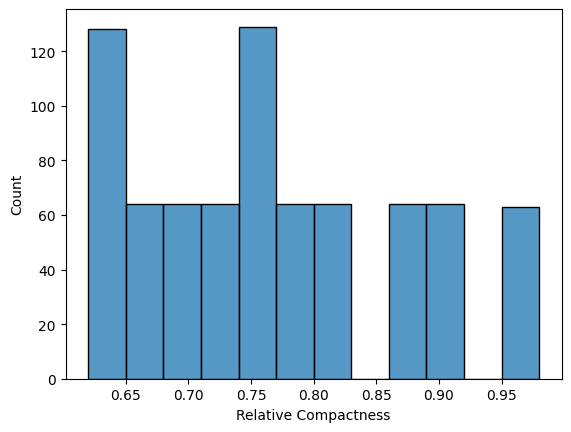

In [ ]:
sns.histplot(x='Relative Compactness', data=energy_df)
plt.show()

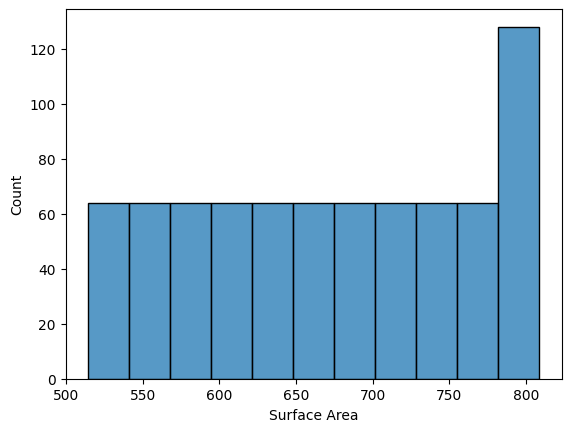

In [ ]:
sns.histplot(x='Surface Area', data=energy_df)
plt.show()

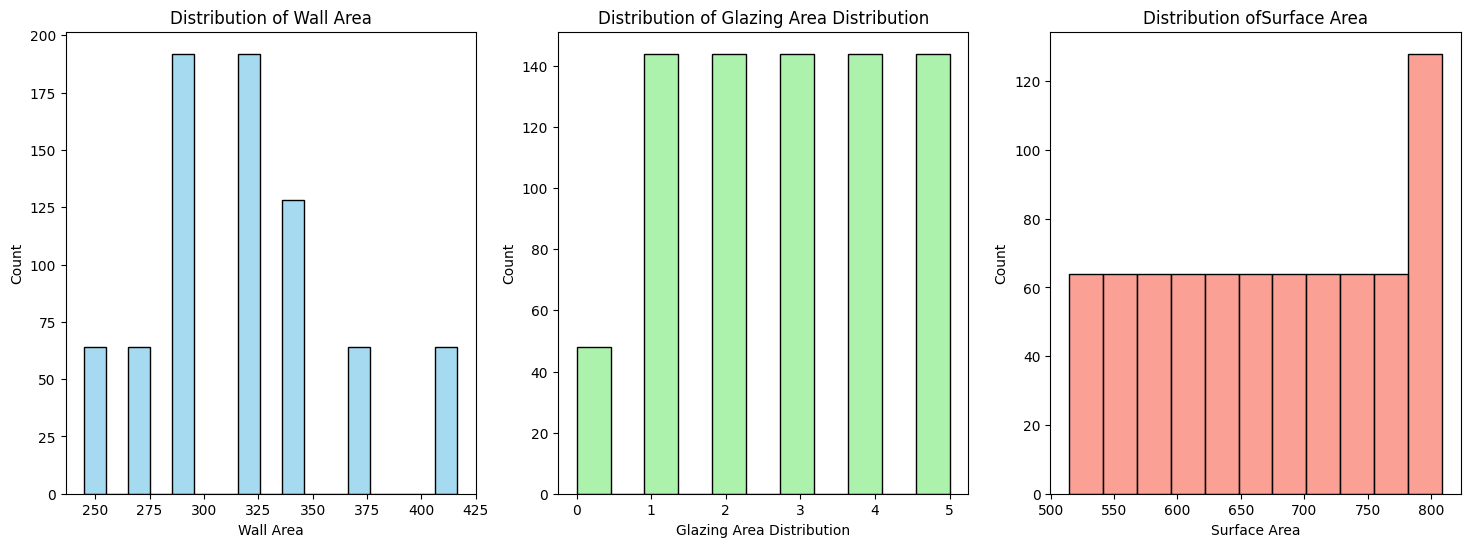

In [ ]:
fig, axes= plt.subplots(1,3, figsize=(18,6))

sns.histplot(energy_df['Wall Area'],ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Wall Area')

sns.histplot(energy_df['Glazing Area Distribution'],ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Glazing Area Distribution')

sns.histplot(energy_df['Surface Area'],ax=axes[2], color='salmon')
axes[2].set_title('Distribution ofSurface Area')

#sns.histplot(x='Wall Area', data=energy_df,  ax= axes[0])

# sns.histplot(x='Roof Area', data=energy_df, ax=axes[1])

# sns.histplot(x='Glazing Area Distribution', data=energy_df,ax=axes[2])

# sns.kdeplot(x='Heating Load', data=energy_df)


plt.show()




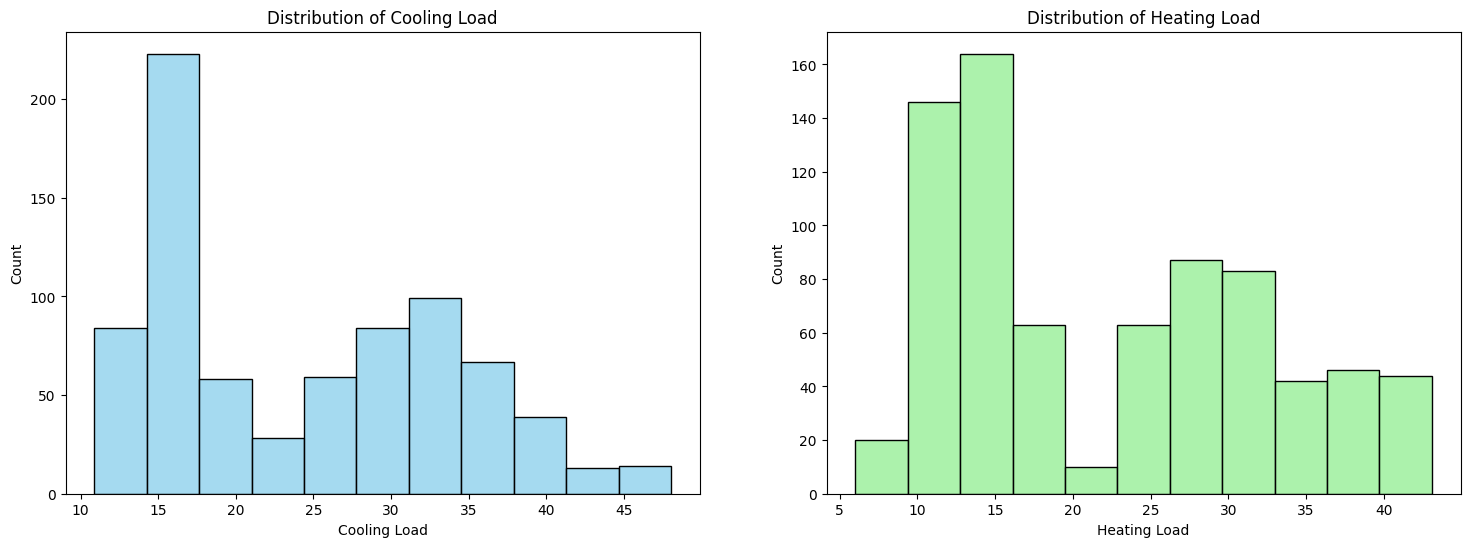

In [ ]:
#Checking distributions of target variables
fig, axes= plt.subplots(1,2, figsize=(18,6))
sns.histplot(energy_df['Cooling Load'],ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Cooling Load')

sns.histplot(energy_df['Heating Load'],ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Heating Load')

plt.show()

#### Bivariate Analysis

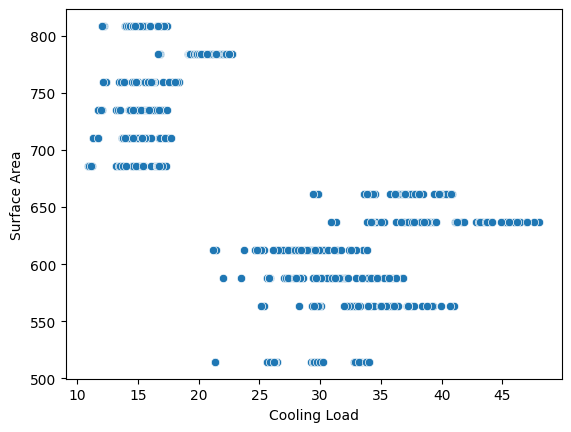

In [ ]:
sns.scatterplot(x= 'Cooling Load', y='Surface Area', data = energy_df)
plt.show()

In [ ]:
energy_df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

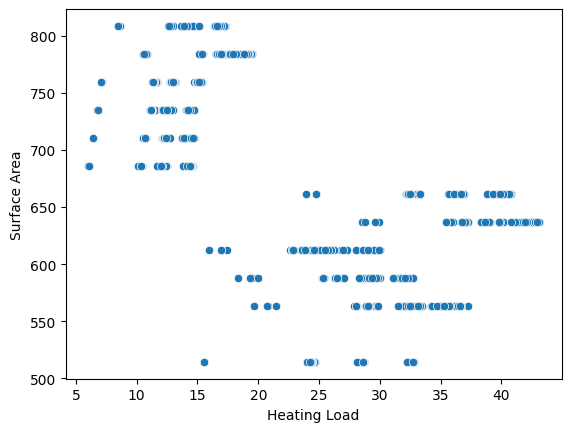

In [ ]:
sns.scatterplot(x= 'Heating Load', y='Surface Area', data = energy_df)
plt.show()

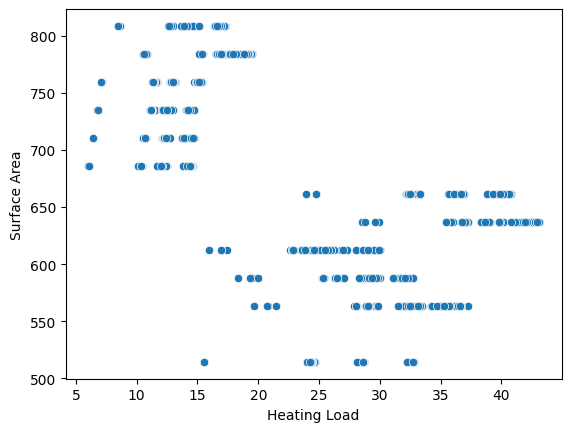

In [ ]:
sns.scatterplot(x= 'Heating Load', y='Surface Area', data = energy_df)
plt.show()

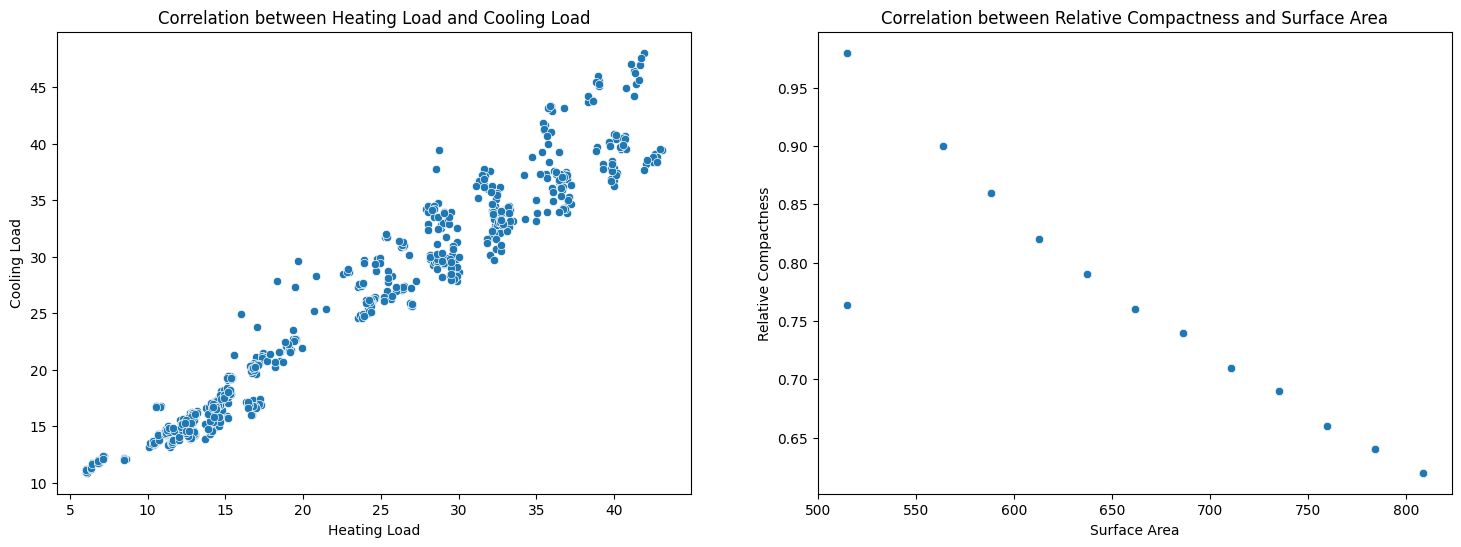

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(18,6))
sns.scatterplot(x= 'Heating Load', y='Cooling Load', data = energy_df,ax=axes[0])
axes[0].set_title('Correlation between Heating Load and Cooling Load')
sns.scatterplot(x='Surface Area', y='Relative Compactness', data= energy_df,ax=axes[1])
axes[1].set_title('Correlation between Relative Compactness and Surface Area')
plt.show()

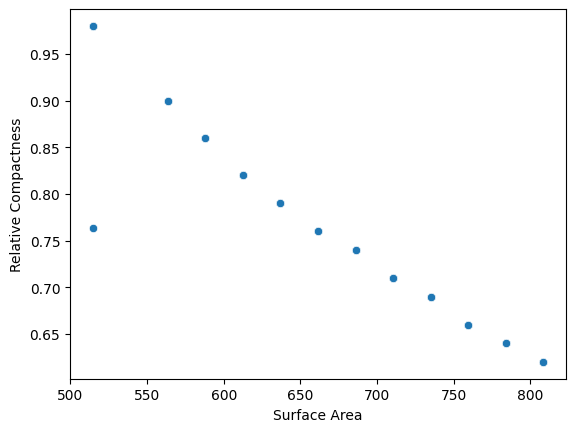

In [ ]:
sns.scatterplot(x='Surface Area', y='Relative Compactness', data= energy_df)

plt.show()

#### Multi-variate Analysis

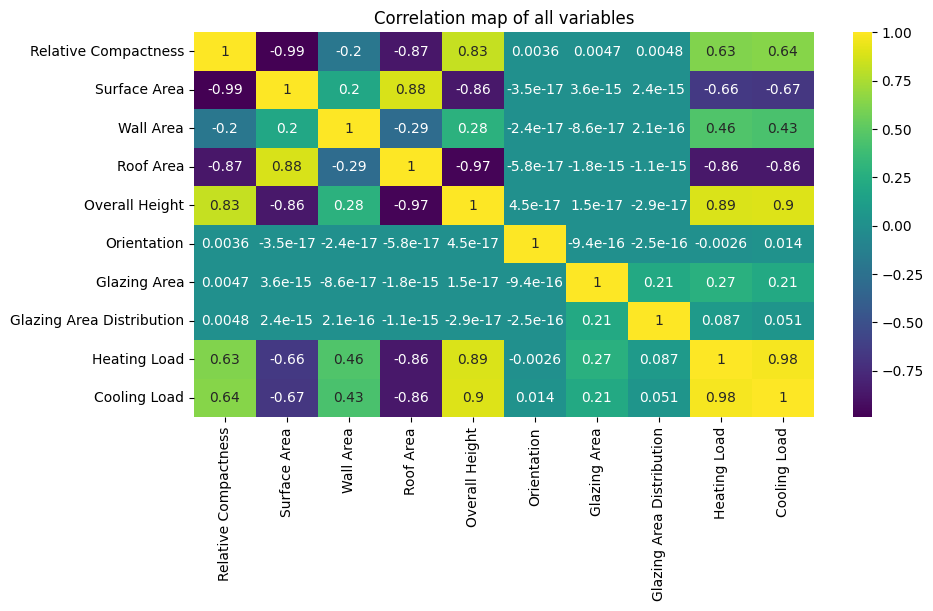

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(energy_df.corr(), annot= True,cmap='viridis')
plt.title('Correlation map of all variables')
plt.show()

### Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE


In [ ]:
#Splitting data into feature and target variable
X= energy_df.drop(columns=['Cooling Load','Heating Load'])
y1= energy_df['Heating Load']
y2=energy_df['Cooling Load']



In [ ]:

X_train, X_test, y1_train, y1_test, y2_train,y2_test = train_test_split(X, y1,
                           y2, test_size=0.25, random_state = 4)
print(y1_train, y1_test, y2_train,y2_test)
#Scaling the feature variables
minmax=MinMaxScaler(feature_range=(0,1))
X_train = minmax.fit_transform(X_train)
X_test= minmax.transform(X_test)

170    10.35
166    32.33
25      6.05
13     17.41
55     28.09
       ...  
360    12.35
709    15.29
439    33.28
174    10.68
122    10.32
Name: Heating Load, Length: 576, dtype: float64 390    32.68
146    24.11
136    15.41
420    12.97
328    17.50
       ...  
18     29.63
633    32.12
214    33.09
203    27.03
651    13.78
Name: Heating Load, Length: 192, dtype: float64 170    13.65
166    34.48
25     11.19
13     21.46
55     34.33
       ...  
360    14.73
709    17.82
439    33.16
174    14.30
122    13.57
Name: Cooling Load, Length: 576, dtype: float64 390    32.83
146    25.84
136    19.23
420    15.53
328    21.13
       ...  
18     30.93
633    34.70
214    33.89
203    25.81
651    16.60
Name: Cooling Load, Length: 192, dtype: float64


### Model Building

SVR before hyperparameter tuning

In [ ]:
#For cooling load
svr1 = SVR()
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))

#for heating load
svr2 = SVR()
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y1: 0.93 
Test set score for y1: 0.92 
Train set score for y2: 0.89 
Test set score for y2: 0.89 


#### Hyperparameter Tuning for SVR, y1 and y2

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr1_grid = GridSearchCV(SVR(), param_grid, cv=5)

svr1_grid .fit(X_train, y1_train)
print("Test set score for y1: {:.2f} ".format(svr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {} ".format(svr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f} ".format(svr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(svr1_grid.best_estimator_))



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr2_grid  = GridSearchCV(SVR(), param_grid, cv=5)

svr2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(svr2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(svr2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(svr2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(svr2_grid.best_estimator_))

Test set score for y1: 0.96 
Best parameters for y1: {'C': 100, 'gamma': 1} 
Best cross-validation score for y1: 0.95 
Best estimator for y1:
SVR(C=100, gamma=1) 
Test set score for target 2: 0.94
Best parameters for target 2: {'C': 100, 'gamma': 1}
Best cross-validation score for target 2: 0.92
Best estimator for target 2:
SVR(C=100, gamma=1) 


#### SVR after hyperparameter tuning

In [ ]:
svr1 = SVR(C=100,gamma=0.1)
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))


svr2 = SVR(C=100, gamma=0.1)
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y1: 0.94 
Test set score for y1: 0.93 
Train set score for y2: 0.90 
Test set score for y2: 0.89 


#### Lasso Regression before Hyperparameter tuning

In [ ]:
lasso1 = Lasso()
lasso1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for y1: 0.74
Test set score for y1: 0.78


In [ ]:
lasso2 = Lasso()
lasso2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for y2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for y2: 0.75
Test set score for y2: 0.78


#### Hyperparameter tuning for Lasso

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_grid1 = GridSearchCV(lasso1, param_grid, cv=5)

lasso_grid1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(lasso_grid1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(lasso_grid1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(lasso_grid1.best_score_))
print("Best estimator for y1:\n{} ".format(lasso_grid1.best_estimator_))

Test set score for y1: 0.92
Best parameters for y1: {'alpha': 0.1}
Best cross-validation score for y1: 0.90
Best estimator for y1:
Lasso(alpha=0.1) 


In [ ]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
lasso_grid2 = GridSearchCV(lasso2, param_grid, cv=5)

lasso_grid2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(lasso_grid2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(lasso_grid2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(lasso_grid2.best_score_))
print("Best estimator for y2:\n{} ".format(lasso_grid2.best_estimator_))

Test set score for y2: 0.89
Best parameters for y2: {'alpha': 0.1}
Best cross-validation score for y2: 0.87
Best estimator for y2:
Lasso(alpha=0.1) 


#### Lasso after hyperparameter tuning

In [ ]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X_train, y1_train)
print("Train set score for target 1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for target 1: 0.91
Test set score for target 1: 0.92


In [ ]:
lasso2 = Lasso(alpha=0.1)
lasso2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for target 2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for target 2: 0.87
Test set score for target 2: 0.89


#### Ridge Regression before hyperparameter tuning


In [ ]:
ridge1 = Ridge()
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.91
Test set score for y1: 0.91


In [ ]:
ridge2 = Ridge()
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.88
Test set score for y2: 0.89


#### Hyperparameter tuning for ridge

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge1_grid = GridSearchCV(ridge1, param_grid, cv=5)

ridge1_grid.fit(X_train, y1_train)
print("Test set score for target 1: {:.2f}".format(ridge1_grid.score(X_test, y1_test)))
print("Best parameters for target 1: {}".format(ridge1_grid.best_params_))
print("Best cross-validation score for target 1: {:.2f}".format(ridge1_grid.best_score_))
print("Best estimator for target 1:\n{} ".format(ridge1_grid.best_estimator_))

Test set score for target 1: 0.92
Best parameters for target 1: {'alpha': 1}
Best cross-validation score for target 1: 0.91
Best estimator for target 1:
Ridge(alpha=1) 


In [ ]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
ridge2_grid = GridSearchCV(ridge2, param_grid, cv=5)

ridge2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(ridge2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(ridge2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(ridge2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(ridge2_grid.best_estimator_))

Test set score for target 2: 0.89
Best parameters for target 2: {'alpha': 1}
Best cross-validation score for target 2: 0.88
Best estimator for target 2:
Ridge(alpha=1) 


#### Ridge regression after hyperparameter tuning

In [ ]:
ridge1 = Ridge(alpha=0.1)
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.91
Test set score for y1: 0.91


In [ ]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.88
Test set score for y2: 0.89


#### KNeigbors Regressor  before hyperparameter tuning

In [ ]:
knr1 = KNeighborsRegressor()
new_var = knr1.fit(X_train, y1_train)
print('Train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('Test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor()
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

Train set score for y1 is 0.95
Test set score for y1 is 0.92

The train set score for y2 is 0.93
The test set score for y2 is 0.91


#### Hyperparameter tuning for KNeighborsRegressor

In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr1_grid = GridSearchCV(knr1, param_grid, cv=5)

knr1_grid.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(knr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(knr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(knr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(knr1_grid.best_estimator_))

Test set score for y1: 0.94
Best parameters for y1: {'n_neighbors': 8}
Best cross-validation score for y1: 0.93
Best estimator for y1:
KNeighborsRegressor(n_neighbors=8) 


In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr2_grid = GridSearchCV(knr2, param_grid, cv=5)

knr2_grid.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(knr2_grid.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(knr2_grid.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(knr2_grid.best_score_))
print("Best estimator for y2:\n{} ".format(knr2_grid.best_estimator_))

Test set score for y2: 0.92
Best parameters for y2: {'n_neighbors': 8}
Best cross-validation score for y2: 0.91
Best estimator for y2:
KNeighborsRegressor(n_neighbors=8) 


#### KNeighbors Regressor after hyperparameter tuning

In [ ]:
knr1 = KNeighborsRegressor(n_neighbors=3)
new_var = knr1.fit(X_train, y1_train)
print('The train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('The test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor(n_neighbors=3)
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

The train set score for y1 is 0.95
The test set score for y1 is 0.92

The train set score for y2 is 0.94
The test set score for y2 is 0.91


#### XGB Regressor before hyperparameter tuning

In [ ]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y1_train, y2_train)

train_accuracy =xgb_regressor.score(X_train, y1_train)
train_accuracy_1 =xgb_regressor.score(X_train,y2_train)
train_accuracy_2 =xgb_regressor.score(X_train,y1_train,y2_train)

accuracy = xgb_regressor.score(X_test, y1_test)
accuracy_1 = xgb_regressor.score(X_test, y2_test)
accuracy2 = xgb_regressor.score(X_test, y1_test, y2_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)
print()
print("Train Accuracy_1:", train_accuracy_1)
print("Test Accuracy_1:", accuracy_1)
print()
print("Train Accuracy_2:", train_accuracy_2)
print("Test Accuracy_2:", accuracy2)


Train Accuracy: 0.9999893436867753
Test Accuracy: 0.9987850377098

Train Accuracy_1: 0.8864415291188192
Test Accuracy_1: 0.8921834203669805

Train Accuracy_2: 0.9999883192511348
Test Accuracy_2: 0.9987416446257916


#### Hyperparameter tuning for XGBoost Regressor

In [ ]:
xgb_reg1 = XGBRegressor()
xgb_reg1.fit(X_train, y1_train)
print('Train set score for y1 is {:.2f}'.format(xgb_reg1.score(X_train, y1_train)))
print('Test set score for y1 is {:.2f}'.format(xgb_reg1.score(X_test, y1_test)))


Train set score for y1 is 1.00
Test set score for y1 is 1.00


In [ ]:
xgb_reg2 = XGBRegressor()
xgb_reg2.fit(X_train, y1_train)
print('The train set score for y2 is {:.2f}'.format(xgb_reg2.score(X_train, y1_train)))
print('The test set score for y2 is {:.2f}'.format(xgb_reg2.score(X_test, y1_test)))


The train set score for y2 is 1.00
The test set score for y2 is 1.00


In [ ]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb1 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(grid_xgb1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(grid_xgb1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(grid_xgb1.best_score_))

Test set score for y1: 1.00
Best parameters for y1: {'learning_rate': 0.1, 'n_estimators': 300}
Best cross-validation score for y1: 1.00


In [ ]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb2 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(grid_xgb2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(grid_xgb2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(grid_xgb2.best_score_))

Test set score for y2: 0.99
Best parameters for y2: {'learning_rate': 1, 'n_estimators': 300}
Best cross-validation score for y2: 0.98


#### XGBoost after HyperParameter Tuning

In [ ]:
xgb_reg1 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg1.fit(X_train, y1_train)

print("Train set score for target 1: {:.2f}".format(xgb_reg1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(xgb_reg1.score(X_test, y1_test)))

Train set score for target 1: 1.00
Test set score for target 1: 1.00


In [ ]:
xgb_reg2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(xgb_reg2.score(X_train, y2_train)))
print("Test set score for target 2: {:.2f}".format(xgb_reg2.score(X_test, y2_test)))

Train set score for target 2: 1.00
Test set score for target 2: 0.99


#### Gradient Boosting Regressor before Hyperparameter Tuning

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr1.fit(X_train, y1_train)
y_pred = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y1 train set: {:.2f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on y1 test set: {:.2f}".format(gbr1.score(X_test,y1_test)))


Test set RMSE: 1.19
R-Squared on y1 train set: 0.98
R-Squared on y1 test set: 0.99


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr2.fit(X_train, y2_train)
y2_pred = gbr2.predict(X_test)
# # Evaluate the test set RMSE
rmse_test = MSE(y2_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train set: {:.2f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on y2 test set: {:.2f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 3.01
R-Squared on y2 train set: 0.96
R-Squared on y2 test set: 0.96


#### Hyperparameter Tuning for Gradient Boosting Regressor

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr1 = GridSearchCV(gbr1, param_grid = param_grid,cv =5)

grid_gbr1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_gbr1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_gbr1.score(X_test,y1_test)))
print('Best parameters:',grid_gbr1.best_params_)

Best cross-validation acuracy for y1: 0.98
Best test score for y1: 0.99
Best parameters: {'max_features': 7, 'max_leaf_nodes': 2}


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr2 = GridSearchCV(gbr2, param_grid = param_grid,cv =5)

grid_gbr2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_gbr2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_gbr2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_gbr2.best_params_)

Best cross-validation acuracy for y2: 0.98
Best test score for y2: 0.89
Best parameters for y2: {'max_features': 7, 'max_leaf_nodes': 2}


#### Gradient Boosting Regressor after Hyperparameter Tuning

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr1.fit(X_train,y1_train)
y_pred_1 = gbr1.predict(X_test)

rmse_test = MSE(y1_test, y_pred_1)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on train dataset: {:.3f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on test dataset: {:.3f}".format(gbr1.score(X_test,y1_test)))

Test set RMSE: 1.19
R-Squared on train dataset: 0.982
R-Squared on test dataset: 0.986


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr2.fit(X_train,y2_train)

y_pred_2 = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred_2)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train dataset: {:.3f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.3f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 1.19
R-Squared on y2 train dataset: 0.959
R-Squared on  y2 test dataset: 0.961


**Random Forest Regressor**

In [ ]:
rf_reg1= RandomForestRegressor()
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 1.00
R-Squared on y1 test dataset: 1.00


In [ ]:
rf_reg2= RandomForestRegressor()
rf_reg2.fit(X_train,y2_train)
print("R-Squared on y2 train dataset: {:.2f}".format(rf_reg1.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.2f}".format(rf_reg1.score(X_test,y2_test)))

R-Squared on y2 train dataset: 0.89
R-Squared on  y2 test dataset: 0.90


#### HyperParameter Tuning on Random Forest Regressor

In [ ]:
rf_reg1 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg1 = GridSearchCV(rf_reg1, param_grid = param_grid, cv =5)

grid_rf_reg1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_rf_reg1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_rf_reg1.score(X_test,y1_test)))
print('Best parameters for y1:',grid_rf_reg1.best_params_)

Best cross-validation acuracy for y1: 0.99
Best test score for y1: 0.99
Best parameters for y1: {'max_depth': 5, 'n_estimators': 100}


In [ ]:
rf_reg2 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg2 = GridSearchCV(rf_reg2, param_grid = param_grid,cv =5)

grid_rf_reg2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_rf_reg2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_rf_reg2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_rf_reg2.best_params_)

Best cross-validation acuracy for y2: 0.99
Best test score for y2: 0.90
Best parameters for y2: {'max_depth': 5, 'n_estimators': 100}


#### Random Forest Regressor after Hyperparameter tuning

In [ ]:
rf_reg1= RandomForestRegressor(n_estimators=400,max_depth=5)
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 0.99
R-Squared on y1 test dataset: 0.99


In [ ]:
rf_reg2= RandomForestRegressor(n_estimators=300, max_depth=5)
rf_reg2.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg2.score(X_train,y2_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg2.score(X_test,y2_test)))

R-Squared on y1 train dataset: 0.89
R-Squared on y1 test dataset: 0.90


**Dummy Regressor**



In [ ]:
import sklearn
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor().fit(X_train, y1_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 1: {:.2f}".format(dummy.score(X_test, y1_test)))

Dummy score for target 1: -0.00


In [ ]:
dummy = DummyRegressor().fit(X_train, y2_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 2: {:.2f}".format(dummy.score(X_test, y2_test)))

Dummy score for target 2: -0.00


### Model Comparison

Creating a DataFrame with Models, R-squared, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and   

In [ ]:

# List of regressors
regressors = [['Support Vector Regressor', svr1],
    ['Lasso', lasso1],
    ['Ridge', ridge1],
    ['KneighborsRegressor', knr1],
    ['XGBoost', xgb_reg1],
    ['GradientBoost', gbr1],
    ['RandomForestRegressor',rf_reg1 ]]



# Train and evaluate each model
heating_df= pd.DataFrame(columns=['Model','R2', 'MSE','RMSE','MAE'])

for name, model in regressors:

    # Making predictions
    y1_pred = model.predict(X_test)

    # Calculating r2,mse,rmse,mae,mape
    r2= model.score(X_test, y1_test)
    mse = MSE(y1_test, y1_pred)
    rmse = mse ** 0.5
    mae= MAE(y1_test, y1_pred)
    heating_df.loc[len(heating_df)] = [name, r2, mse, rmse, mae]
print('Metrics for Heating load Predictions')
heating_df.sort_values(by='R2', ascending=False)



Metrics for Heating load Predictions


,Model,R2,MSE,RMSE,MAE
4,XGBoost,0.998889,0.109022,0.330185,0.211879
6,RandomForestRegressor,0.993014,0.685773,0.828114,0.552542
5,GradientBoost,0.985532,1.420264,1.191748,0.928663
0,Support Vector Regressor,0.929410,6.929367,2.632369,1.640182
3,KneighborsRegressor,0.920421,7.811681,2.794938,1.940833
1,Lasso,0.915955,8.250071,2.872294,2.065862
2,Ridge,0.911547,8.682825,2.946663,2.226071


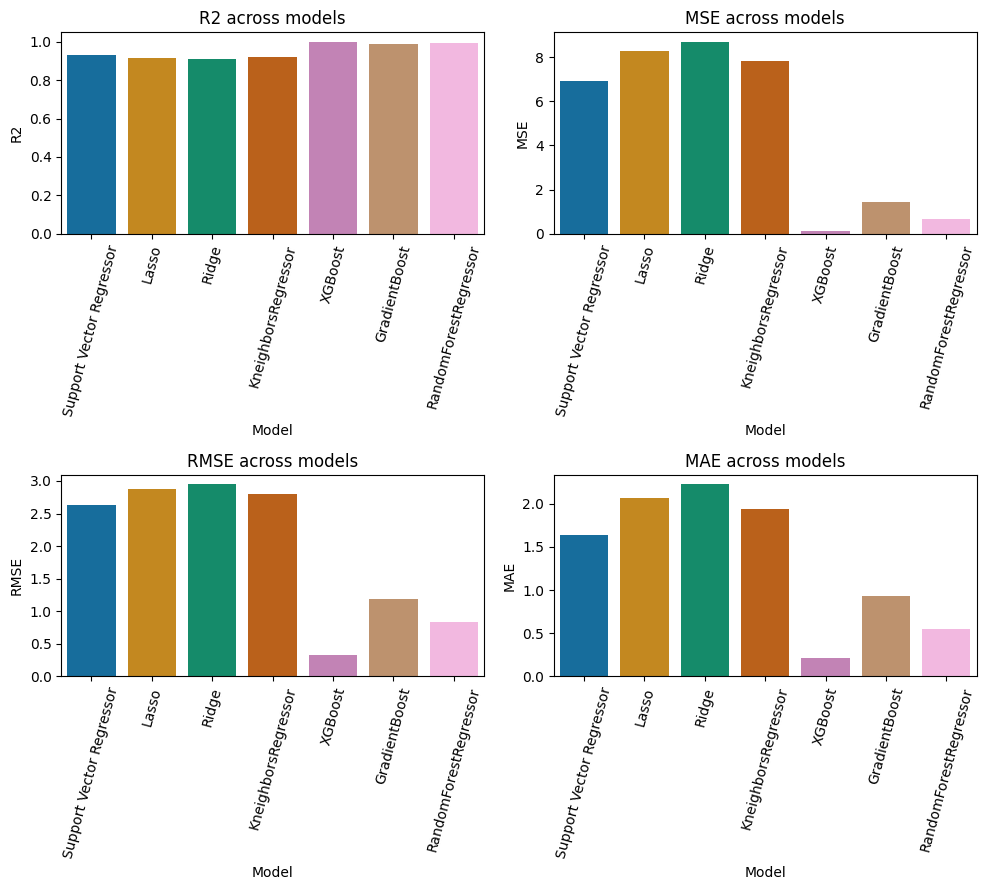

In [ ]:
#plotting a graph of models against metrics
fig, axes=plt.subplots(2,2,figsize=(10,9))
sns.barplot(x='Model', y='R2', data=heating_df,ax=axes[0,0], palette='colorblind')
sns.barplot(x='Model', y='MSE', data=heating_df,ax=axes[0,1], palette='colorblind')
sns.barplot(x='Model', y='RMSE', data=heating_df,ax=axes[1,0], palette='colorblind')
sns.barplot(x='Model', y='MAE', data=heating_df,ax=axes[1,1], palette='colorblind')
axes[0,0].set_title('R2 across models')
axes[0,1].set_title('MSE across models')
axes[1,0].set_title('RMSE across models')
axes[1,1].set_title('MAE across models')
axes[0,0].set_ylabel('R2')
axes[0,1].set_ylabel('MSE')
axes[1,0].set_ylabel('RMSE')
axes[1,1].set_ylabel('MAE')
axes[0,0].set_xticklabels(
    axes[0,0].get_xticklabels(),
    rotation=75)
axes[0,1].set_xticklabels(
    axes[0,1].get_xticklabels(),
    rotation=75)
axes[1,0].set_xticklabels(
    axes[1,0].get_xticklabels(),
    rotation=75)
axes[1,1].set_xticklabels(
    axes[1,1].get_xticklabels(),
    rotation=75)



plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error

# List of regressors
regressors = [
    ['Support Vector Regressor', svr2],
    ['Lasso', lasso2],
    ['Ridge', ridge2],
    ['KneighborsRegressor', knr2],
    ['XGBoost', xgb_reg2],
    ['GradientBoost', gbr2],
    ['RandomForestRegressor',rf_reg2]
]



# Creating a DataFrame
cooling_df= pd.DataFrame(columns=['Model','R2', 'MSE','RMSE','MAE'])

for name, model in regressors:

    # Make predictions

    y2_pred = model.predict(X_test)

    # Calculate Mean Squared Error and Root Mean Squared Error
    r2= model.score(X_test, y2_test)
    mse = MSE(y2_test, y2_pred)
    rmse = mse ** 0.5
    mae= MAE(y2_test, y2_pred)
    cooling_df.loc[len(cooling_df)] = [name,r2, mse, rmse,mae]
print('Metrics for Cooling load Predictions')
cooling_df.sort_values(by='R2', ascending=False)







Metrics for Cooling load Predictions


,Model,R2,MSE,RMSE,MAE
4,XGBoost,0.992748,0.616401,0.785112,0.486719
5,GradientBoost,0.961247,3.293724,1.814862,1.252941
3,KneighborsRegressor,0.907684,7.846089,2.801087,2.022639
6,RandomForestRegressor,0.896486,8.797884,2.966123,2.472119
0,Support Vector Regressor,0.892883,9.104055,3.017293,1.903790
2,Ridge,0.891255,9.242410,3.040133,2.155680
1,Lasso,0.890647,9.294145,3.048630,2.174987


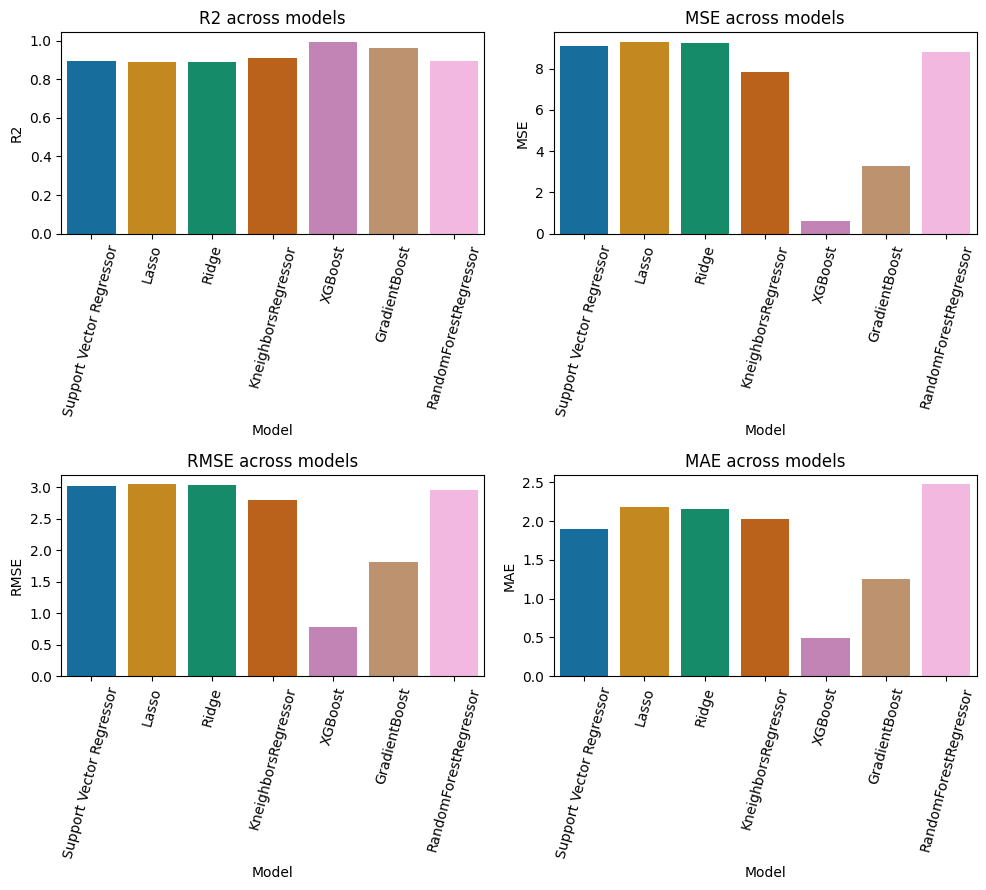

In [ ]:
# orderr2=cooling_df.sort_values(by='R2')
# ordermse=cooling_df.sort_values(by='MSE')
# orderrmse=cooling_df.sort_values(by='RMSE')
# ordermae=cooling_df.sort_values(by='MAE')

fig, axes=plt.subplots(2,2,figsize=(10,9))
sns.barplot(x='Model', y='R2', data=cooling_df, ax=axes[0,0], palette='colorblind')
sns.barplot(x='Model', y='MSE', data=cooling_df,ax=axes[0,1], palette='colorblind')
sns.barplot(x='Model', y='RMSE', data=cooling_df,ax=axes[1,0], palette='colorblind')
sns.barplot(x='Model', y='MAE', data=cooling_df,ax=axes[1,1], palette='colorblind')
axes[0,0].set_title('R2 across models')
axes[0,1].set_title('MSE across models')
axes[1,0].set_title('RMSE across models')
axes[1,1].set_title('MAE across models')
axes[0,0].set_ylabel('R2')
axes[0,1].set_ylabel('MSE')
axes[1,0].set_ylabel('RMSE')
axes[1,1].set_ylabel('MAE')
axes[0,0].set_xticklabels(
    axes[0,0].get_xticklabels(),
    rotation=75)
axes[0,1].set_xticklabels(
    axes[0,1].get_xticklabels(),
    rotation=75)
axes[1,0].set_xticklabels(
    axes[1,0].get_xticklabels(),
    rotation=75)
axes[1,1].set_xticklabels(
    axes[1,1].get_xticklabels(),
    rotation=75)
plt.tight_layout()
plt.show()

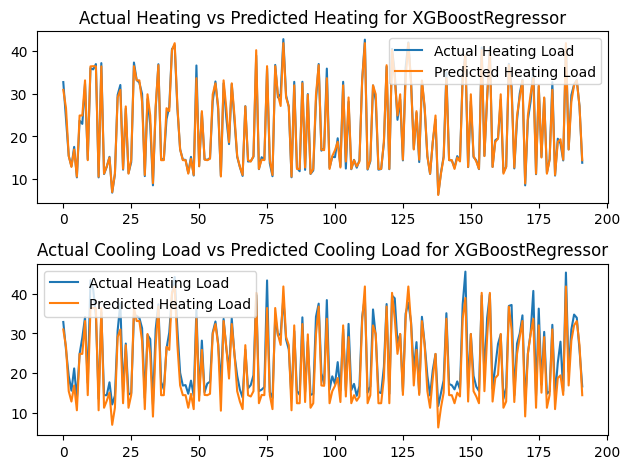

In [ ]:
#Visualising test and predicted for both heating and cooling load
x_axis=range(len(y1_test))
plt.subplot(2,1,1)
plt.plot(x_axis,y1_test,label='Actual Heating Load')
plt.plot(x_axis,y1_pred,label='Predicted Heating Load')
plt.title('Actual Heating vs Predicted Heating for XGBoostRegressor')
plt.legend()


plt.subplot(2,1,2)
plt.plot(x_axis,y2_test,label='Actual Heating Load')
plt.plot(x_axis,y2_pred, label='Predicted Heating Load')
plt.title('Actual Cooling Load vs Predicted Cooling Load for XGBoostRegressor')
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion

Our goal in this project was to use Building Energy Efficiency dataset to create a prediction model for Cooling Load and Heating Load.

Data cleaning and validation as well as Exploratory Data Analysis was performed
on the data set to ensure effective model building.

The data set was split into one train and two test sets for predictive model building.

The XGBoostRegressor, with an R2 score of 0.9877 and 0.9985 for Cooling Load and Heating Load respectively, was found to be the best-performing regression model after a variety of models, including Support Vector Regressor, Random Forest and Random Forest Regressor.The Support Vector Regressor was ranked as the second-best model.

Other metrics such as the Root Mean Squared error and Mean Squared error were also employed to measure model errors.